In [34]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

PROJECT_ROOT = Path.cwd().parent  # assuming notebook is in ./notebooks/
DATA_DIR = PROJECT_ROOT / "data"

prices_df = pd.read_csv(DATA_DIR / "./raw/raw_prices.csv", parse_dates=["Date"])

In [60]:
# Small pre-processing, extract log returns for each ticker
# Ensure sorted by Date within each ticker
prices_df = prices_df.sort_values(["Ticker", "Date"])

# Compute log return: log(P_t / P_{t-1})
prices_df["LogRet"] = prices_df.groupby("Ticker")["Close"].transform(
    lambda x: np.log(x / x.shift(1))
)

# Add log of closing price
prices_df["LogClose"] = prices_df.groupby("Ticker")["Close"].transform(lambda x: np.log(x))


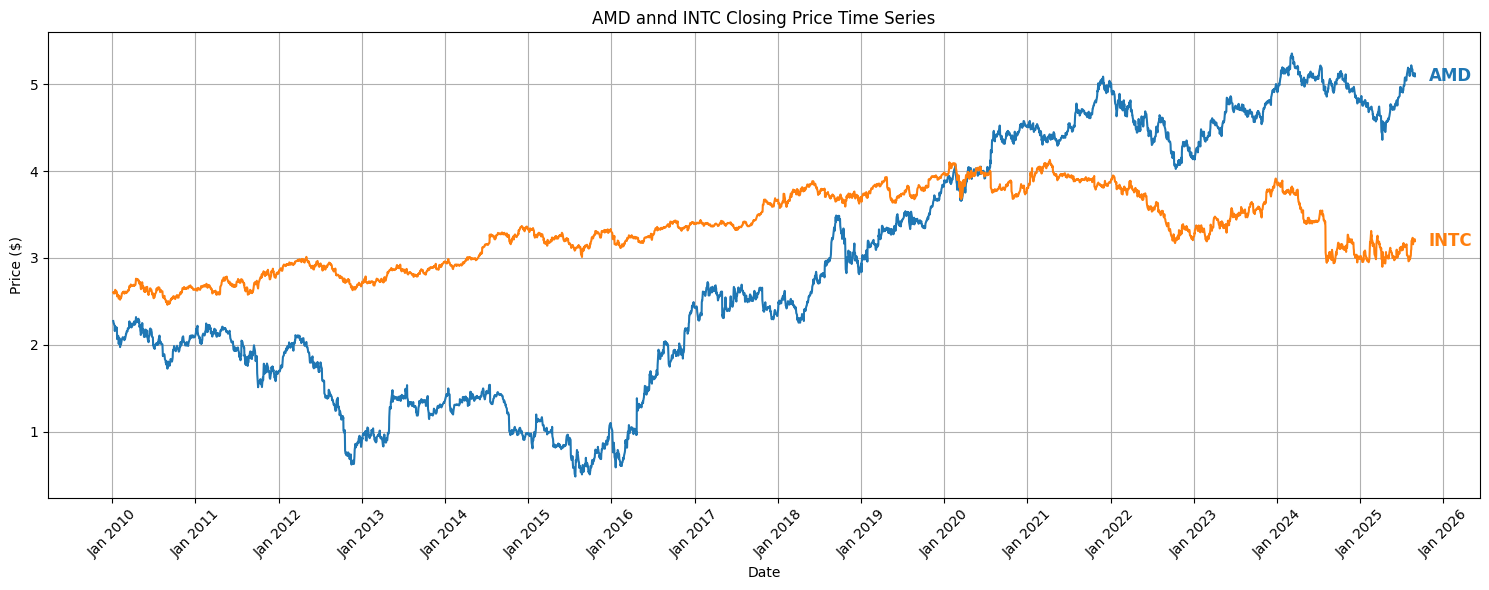

In [61]:
# Plot time series of close data for unique ticker
ticker_1 = "AMD"
ticker_2 = "INTC"

# Extract data for each ticker
df_ticker_1 = prices_df[prices_df["Ticker"] == ticker_1]
df_ticker_2 = prices_df[prices_df["Ticker"] == ticker_2]

# Extract date range for plot
start, end = df_ticker_1["Date"].min(), df_ticker_1["Date"].max()

# Plot time series
plt.figure(figsize=(15, 6))
plt.plot(df_ticker_1["Date"], df_ticker_1["LogClose"], label=f"{df_ticker_1} LogClose")
plt.plot(df_ticker_2["Date"], df_ticker_2["LogClose"], label=f"{df_ticker_2} LogClose")

plt.title(f"{ticker_1} annd {ticker_2} Closing Price Time Series")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.grid(True)

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(1))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))

plt.xticks(rotation=45)
plt.tight_layout()

# Label for ticker 1
last_date_1 = df_ticker_1["Date"].iloc[-1]
last_price_1 = df_ticker_1["LogClose"].iloc[-1]
plt.text(
    last_date_1 + pd.Timedelta(days=60), last_price_1, ticker_1,
    fontsize=12, fontweight="bold", color="tab:blue",
    va="center", ha="left"
)

# Label for ticker 2
last_date_2 = df_ticker_2["Date"].iloc[-1]
last_price_2 = df_ticker_2["LogClose"].iloc[-1]
plt.text(
    last_date_2 + pd.Timedelta(days=60), last_price_2, ticker_2,
    fontsize=12, fontweight="bold", color="tab:orange",
    va="center", ha="left"
)

plt.show()

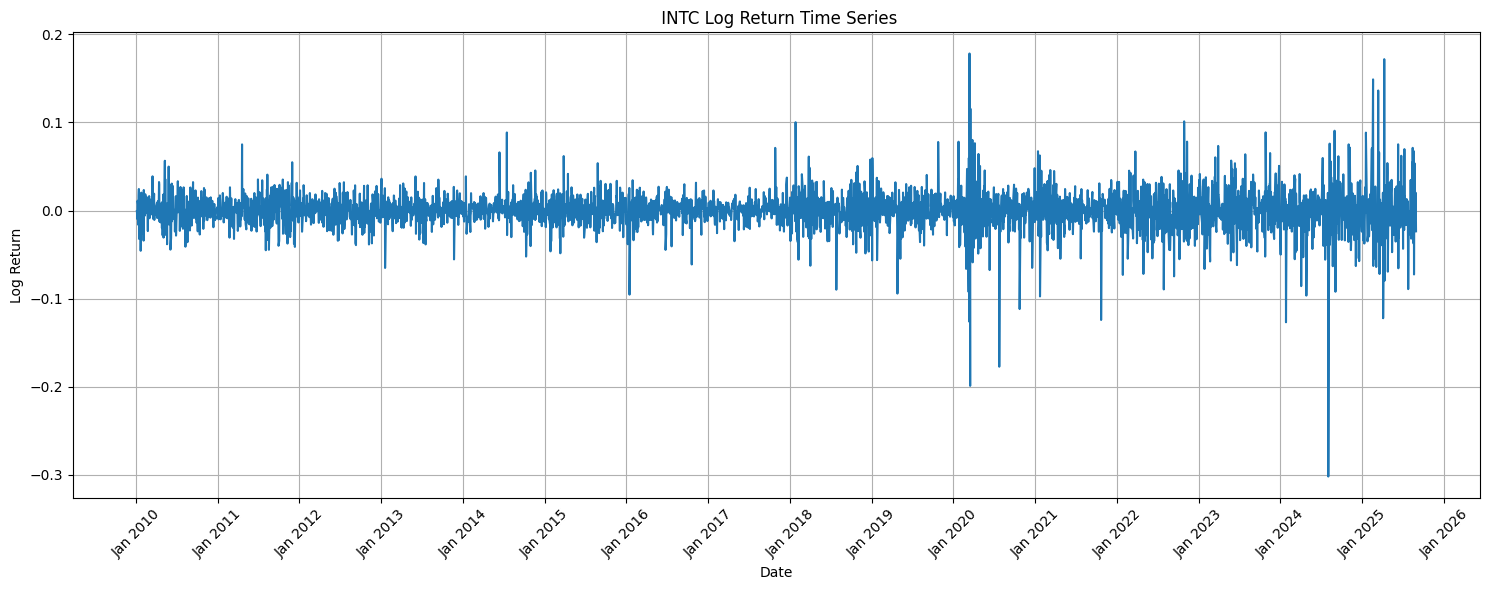

In [58]:
# Plot time series of log returns for unique ticker
ticker = "INTC"

# Extract data for each ticker
df_ticker = prices_df[prices_df["Ticker"] == ticker]

# Extract date range for plot
start, end = df_ticker["Date"].min(), df_ticker["Date"].max()

# Plot time series
plt.figure(figsize=(15, 6))
plt.plot(df_ticker["Date"], df_ticker["LogRet"], label=f"{ticker} LogRet")

plt.title(f" {ticker} Log Return Time Series")
plt.xlabel("Date")
plt.ylabel("Log Return")
plt.grid(True)

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(1))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()